# **Logistic Regression from Scratch**  
This notebook provides a Python implementation of the logistic regression algorithm from the ground up, using only NumPy for numerical operations and Matplotlib/Scikit-learn for data generation and visualization. The primary goal is to demonstrate a fundamental understanding of the core mechanics of logistic regression, including the cost function, gradient descent, and decision boundary visualization.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.datasets import make_classification

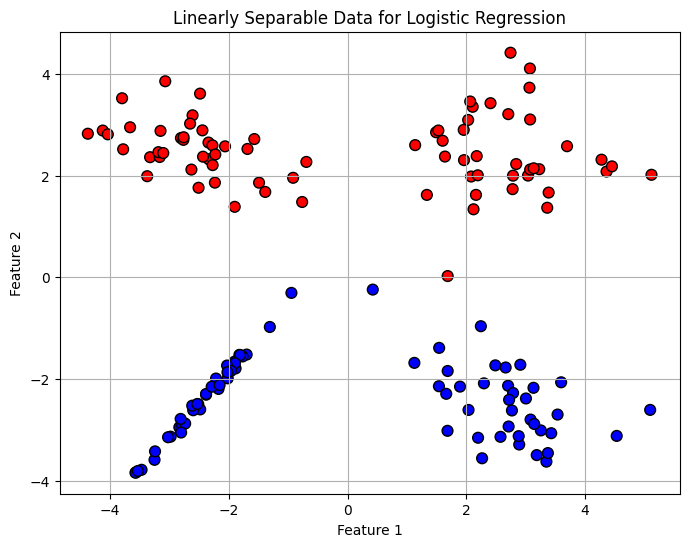

In [39]:
# Generate clean, linearly separable data suitable for logistic regression
X, y = make_classification(n_samples=150,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_classes=2,
                           class_sep=2.5,
                           random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=60)
plt.title('Linearly Separable Data for Logistic Regression')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

$$
\frac{d(\sigma(x))}{dx} = \frac{0 \cdot (1 + e^{-x}) - (1) \cdot (e^{-x} \cdot (-1))}{(1 + e^{-x})^2}
$$

$$
\frac{d(\sigma(x))}{dx} = \frac{e^{-x}}{(1 + e^{-x})^2} = \frac{1 + e^{-x} - 1}{(1 + e^{-x})^2} = \frac{1 + e^{-x}}{(1 + e^{-x})^2} - \frac{1}{(1 + e^{-x})^2}
$$

$$
\frac{d(\sigma(x))}{dx} = \frac{1}{1 + e^{-x}} \cdot \left(1 - \frac{1}{1 + e^{-x}}\right) = \sigma(x)(1 - \sigma(x))
$$

In [40]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

**Cost Function**

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[
y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)}))
\right]
$$


In [41]:
def compute_cost(X, y, w, b):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value
      w : (ndarray Shape (n,))  values of parameters of the model
      b : (scalar)              value of bias parameter of the model
    Returns:
      total_cost : (scalar) cost
    """

    m, n = X.shape
    total_cost = 0

    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        total_cost += -y[i]*np.log(f_wb_i) - (1 - y[i])*np.log(1 - f_wb_i)
    total_cost = total_cost / m

    return total_cost

$$
h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}} = \sigma(\theta^T x)
$$


\begin{align*}
\frac{\partial (J(\theta))}{\partial \theta_j} = -\frac{1}{m} \Bigg[ & \sum_{i=1}^{m} \left[ y^{(i)} \cdot \frac{1}{h_{\theta}(x^{(i)})} \cdot \frac{\partial (h_{\theta}(x^{(i)}))}{\partial \theta_j} \right] \\
& + \sum_{i=1}^{m} \left[ (1 - y^{(i)}) \cdot \frac{1}{1 - h_{\theta}(x^{(i)})} \cdot \frac{\partial (1 - h_{\theta}(x^{(i)}))}{\partial \theta_j} \right] \Bigg]
\end{align*}

\begin{align*}
\frac{\partial (J(\theta))}{\partial \theta_j} = -\frac{1}{m} \Bigg[ & \sum_{i=1}^{m} \left[ y^{(i)} \cdot \frac{1}{h_{\theta}(x^{(i)})} \cdot \sigma(z)(1-\sigma(z)) \cdot \frac{\partial (\theta^T x)}{\partial \theta_j} \right] \\
& + \sum_{i=1}^{m} \left[ (1 - y^{(i)}) \cdot \frac{1}{1 - h_{\theta}(x^{(i)})} \cdot \left(-\sigma(z)(1-\sigma(z)) \cdot \frac{\partial (\theta^T x)}{\partial \theta_j}\right) \right] \Bigg]
\end{align*}

\begin{align*}
\frac{\partial (J(\theta))}{\partial \theta_j} = -\frac{1}{m} \Bigg[ & \sum_{i=1}^{m} \left[ y^{(i)} \cdot \frac{1}{h_{\theta}(x^{(i)})} \cdot \frac{\partial (h_{\theta}(x^{(i)}))}{\partial \theta_j} \right] \\
& + \sum_{i=1}^{m} \left[ (1 - y^{(i)}) \cdot \frac{1}{1 - h_{\theta}(x^{(i)})} \cdot \frac{\partial (1 - h_{\theta}(x^{(i)}))}{\partial \theta_j} \right] \Bigg]
\end{align*}

\begin{align*}
\frac{\partial (J(\theta))}{\partial \theta_j} = -\frac{1}{m} \Bigg[ & \sum_{i=1}^{m} \left[ y^{(i)} \cdot \frac{1}{h_{\theta}(x^{(i)})} \cdot \sigma(z)(1-\sigma(z)) \cdot \frac{\partial (\theta^T x)}{\partial \theta_j} \right] \\
& + \sum_{i=1}^{m} \left[ (1 - y^{(i)}) \cdot \frac{1}{1 - h_{\theta}(x^{(i)})} \cdot \left(-\sigma(z)(1-\sigma(z)) \cdot \frac{\partial (\theta^T x)}{\partial \theta_j}\right) \right] \Bigg]
\end{align*}

\begin{align*}
\frac{\partial (J(\theta))}{\partial \theta_j} = -\frac{1}{m} \Bigg[ & \sum_{i=1}^{m} \left[ y^{(i)} \cdot \frac{1}{h_{\theta}(x^{(i)})} \cdot \sigma(z)(1-\sigma(z)) \cdot \frac{\partial (\theta^T x)}{\partial \theta_j} \right] \\
& + \sum_{i=1}^{m} \left[ (1 - y^{(i)}) \cdot \frac{1}{1 - h_{\theta}(x^{(i)})} \cdot \left(-\sigma(z)(1-\sigma(z)) \cdot \frac{\partial (\theta^T x)}{\partial \theta_j}\right) \right] \Bigg]
\end{align*}

\begin{align*}
\frac{\partial (J(\theta))}{\partial \theta_j} = -\frac{1}{m} \Bigg[ & \sum_{i=1}^{m} \left[ y^{(i)} \cdot \frac{1}{h_{\theta}(x^{(i)})} \cdot h_{\theta}(x^{(i)})(1 - h_{\theta}(x^{(i)})) \cdot x_j^{(i)} \right] \\
& + \sum_{i=1}^{m} \left[ (1 - y^{(i)}) \cdot \frac{1}{1 - h_{\theta}(x^{(i)})} \cdot (-h_{\theta}(x^{(i)})(1 - h_{\theta}(x^{(i)})) \cdot x_j^{(i)}) \right] \Bigg]
\end{align*}

$$
\frac{\partial (J(\theta))}{\partial \theta_j} = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \cdot (1 - h_{\theta}(x^{(i)})) \cdot x_j^{(i)} - (1 - y^{(i)}) \cdot h_{\theta}(x^{(i)}) \cdot x_j^{(i)} \right]
$$

$$
\frac{\partial (J(\theta))}{\partial \theta_j} = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} - y^{(i)}h_{\theta}(x^{(i)}) - h_{\theta}(x^{(i)}) + y^{(i)}h_{\theta}(x^{(i)}) \right] \cdot x_j^{(i)}
$$

$$
\frac{\partial (J(\theta))}{\partial \theta_j} = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} - h_{\theta}(x^{(i)}) \right] \cdot x_j^{(i)}
$$

$$
\frac{\partial J(w, b)}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m} \left( h_{w,b}(x^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$


$$
\frac{\partial J(w, b)}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} \left( h_{w,b}(x^{(i)}) - y^{(i)} \right)
$$


In [42]:
def compute_gradient(X, y, w, b):
    """
    Computes the gradient for logistic regression

    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value
      w : (ndarray Shape (n,))  values of parameters of the model
      b : (scalar)              value of bias parameter of the model
    Returns
      dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w.
      dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b.
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.0

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i], w) + b)
        err_i = f_wb_i - y[i]
        dj_dw += err_i * X[i]
        dj_db += err_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [43]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X :    (ndarray Shape (m, n) data, m examples by n features
      y :    (ndarray Shape (m,))  target value
      w_in : (ndarray Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)              Initial value of parameter of the model
      cost_function :              function to compute cost
      gradient_function :          function to compute gradient
      alpha : (float)              Learning rate
      num_iters : (int)            number of iterations to run gradient descent

    Returns:
      w : (ndarray Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """

    # number of training examples
    m = len(X)

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in)

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        cost =  cost_function(X, y, w_in, b_in)
        J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w_in, b_in, J_history, w_history #return w,b and J,w history for graphing

In [44]:
# Train
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8
iterations = 10000

w, b, J_history, w_history = gradient_descent(X, y, initial_w, initial_b, compute_cost, compute_gradient, 0.001, iterations)

Iteration    0: Cost     4.00   
Iteration 1000: Cost     2.23   
Iteration 2000: Cost     0.91   
Iteration 3000: Cost     0.43   
Iteration 4000: Cost     0.26   
Iteration 5000: Cost     0.19   
Iteration 6000: Cost     0.15   
Iteration 7000: Cost     0.13   
Iteration 8000: Cost     0.11   
Iteration 9000: Cost     0.10   
Iteration 9999: Cost     0.09   


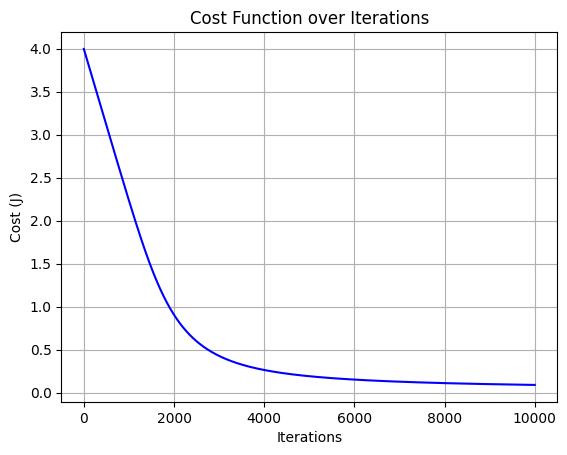

In [45]:
plt.plot(range(iterations), J_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost (J)')
plt.title('Cost Function over Iterations')
plt.grid(True)
plt.show()


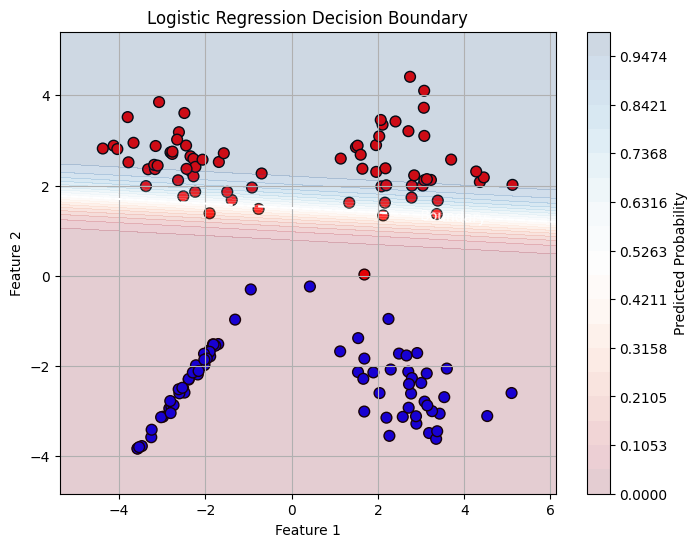

In [46]:
# Predict probabilities
def predict(X, w, b):
    return sigmoid(np.dot(X, w) + b)

# mesh grid over feature space
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

grid = np.c_[xx.ravel(), yy.ravel()]
Z = predict(grid, w, b).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=60)

contour = plt.contour(xx, yy, Z, levels=[0.5], cmap="Greys", linestyles='--')
plt.clabel(contour, fmt={0.5: 'Boundary'}, inline=True)
plt.contourf(xx, yy, Z, levels=np.linspace(0, 1, 20), cmap='RdBu', alpha=0.2)

plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.colorbar(label='Predicted Probability')
plt.show()

In [47]:
X_sample = X[:20]
y_sample = y[:20]

probs = sigmoid(np.dot(X_sample, w) + b)
preds = (probs >= 0.5).astype(int)

df_result = pd.DataFrame({
    'Feature 1': X_sample[:, 0],
    'Feature 2': X_sample[:, 1],
    'Actual Label': y_sample,
    'Predicted Probability': probs,
    'Predicted Label': preds
})

df_result = df_result.round(3)
df_result

,Feature 1,Feature 2,Actual Label,Predicted Probability,Predicted Label
0,3.073,4.102,1,1.000,1
1,-3.252,-3.584,0,0.000,0
2,-2.384,-2.305,0,0.000,0
3,-1.686,2.522,1,0.979,1
4,3.229,2.124,1,0.961,1
5,-3.327,2.360,1,0.944,1
6,2.911,-1.717,0,0.000,0
7,1.895,-2.146,0,0.000,0
8,2.745,4.412,1,1.000,1
9,-2.174,-2.192,0,0.000,0
